In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glass = pd.read_csv(url, header=None, names=column_names)

# Drop the 'Id' column as it is not needed for analysis
glass.drop(columns=['Id'], inplace=True)

# Display the first few rows of the dataset
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


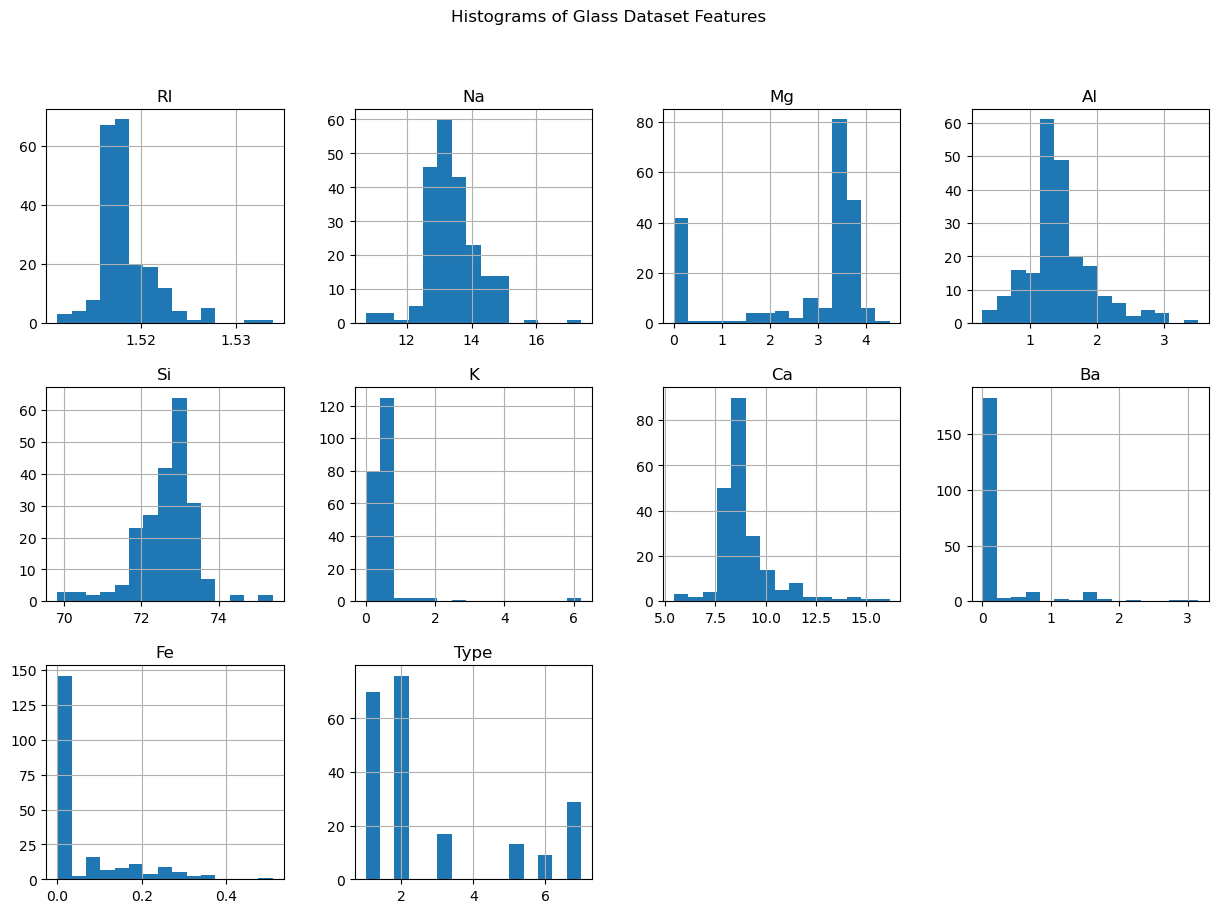

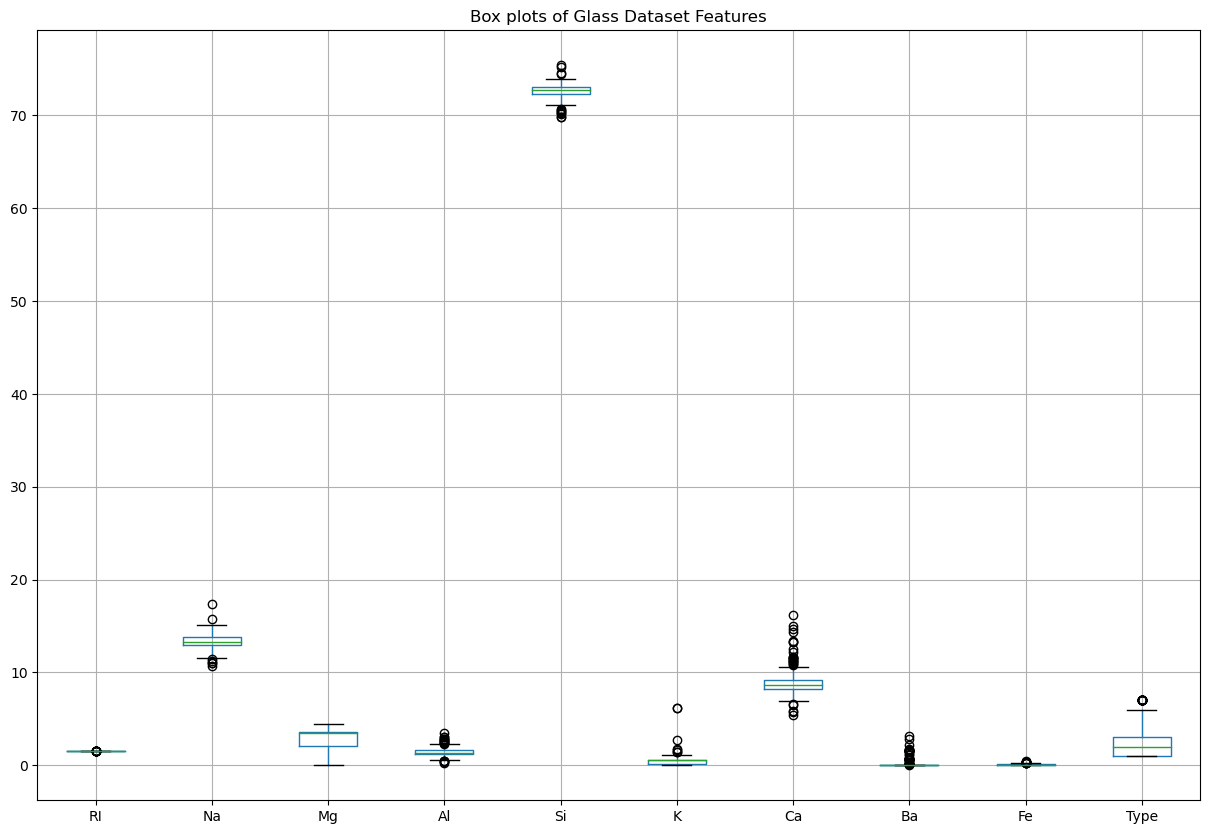

/Users/kirtisailinaidu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


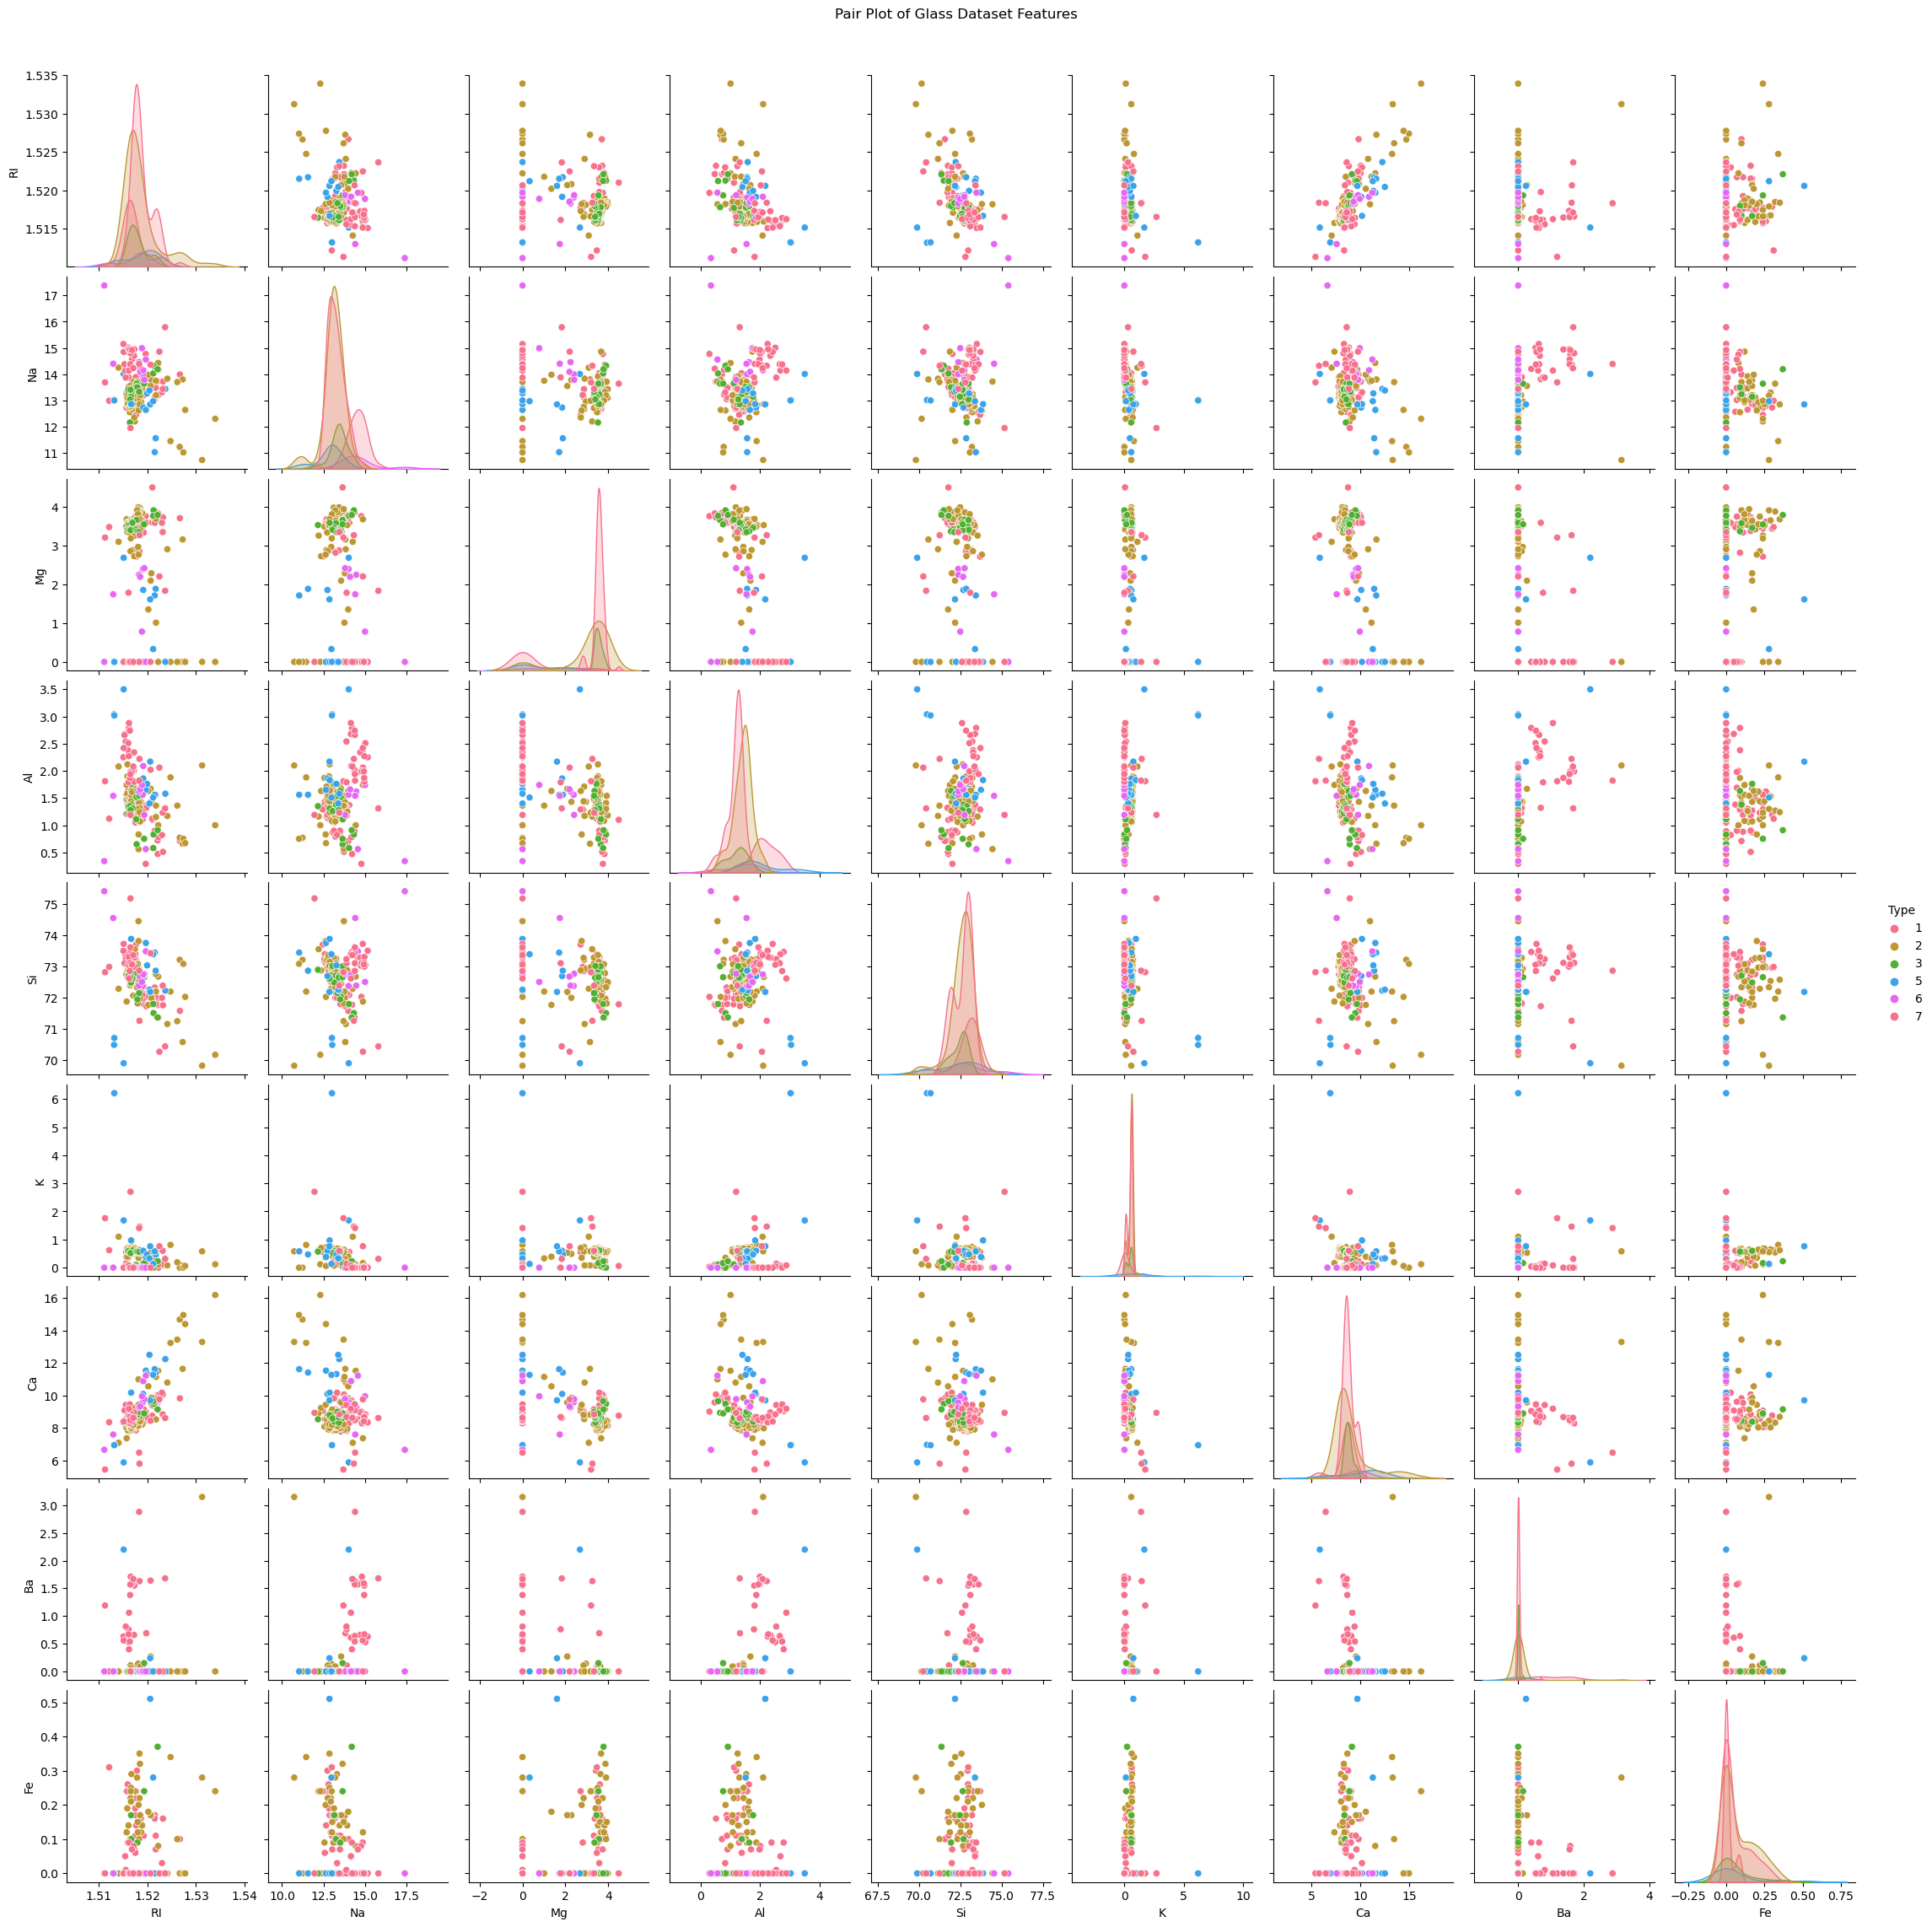

In [4]:
# Histograms of all features
glass.hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Histograms of Glass Dataset Features')
plt.show()

# Box plots of all features
plt.figure(figsize=(15, 10))
glass.boxplot()
plt.title('Box plots of Glass Dataset Features')
plt.show()

# Pair plot to visualize relationships between features
sns.pairplot(glass, hue='Type', palette='husl')
plt.suptitle('Pair Plot of Glass Dataset Features', y=1.02)
plt.show()

In [5]:
# Check for missing values
missing_values = glass.isnull().sum()
missing_values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
# Feature scaling
features = glass.drop(columns=['Type'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Combine the scaled features with the target variable
scaled_glass = pd.DataFrame(scaled_features, columns=features.columns)
scaled_glass['Type'] = glass['Type']

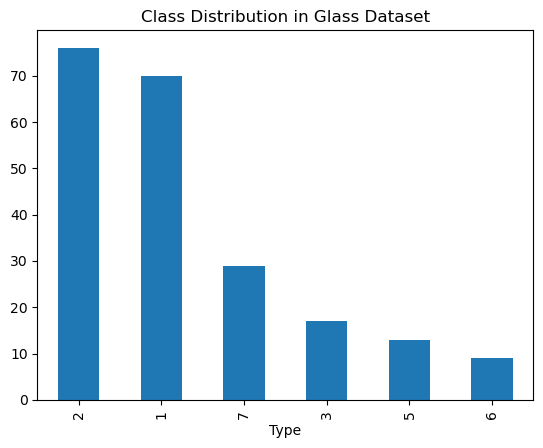

In [7]:
# Check class distribution
class_distribution = glass['Type'].value_counts()
class_distribution.plot(kind='bar', title='Class Distribution in Glass Dataset')
plt.show()

In [8]:
# Split the data into train and test sets
X = scaled_glass.drop(columns=['Type'])
y = scaled_glass['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
# Implement Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test data
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8307692307692308
Precision: 0.8486813186813187
Recall: 0.8307692307692308
F1 Score: 0.8253058109835603
              precision    recall  f1-score   support

           1       0.80      0.95      0.87        21
           2       0.86      0.78      0.82        23
           3       1.00      0.40      0.57         5
           5       0.60      0.75      0.67         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.83        65
   macro avg       0.83      0.80      0.79        65
weighted avg       0.85      0.83      0.83        65



In [10]:
from sklearn.ensemble import BaggingClassifier

# Implement Bagging Classifier with Random Forest
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict on test data
y_pred_bagging = bagging_clf.predict(X_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print(f'Bagging Accuracy: {accuracy_bagging}')
print(f'Bagging Precision: {precision_bagging}')
print(f'Bagging Recall: {recall_bagging}')
print(f'Bagging F1 Score: {f1_bagging}')

Bagging Accuracy: 0.7846153846153846
Bagging Precision: 0.7924601039985656
Bagging Recall: 0.7846153846153846
Bagging F1 Score: 0.7737251540004982


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# Implement Gradient Boosting Classifier
boosting_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_clf.fit(X_train, y_train)

# Predict on test data
y_pred_boosting = boosting_clf.predict(X_test)

# Evaluate the model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

print(f'Boosting Accuracy: {accuracy_boosting}')
print(f'Boosting Precision: {precision_boosting}')
print(f'Boosting Recall: {recall_boosting}')
print(f'Boosting F1 Score: {f1_boosting}')

Boosting Accuracy: 0.8153846153846154
Boosting Precision: 0.8332167832167832
Boosting Recall: 0.8153846153846154
Boosting F1 Score: 0.8053724053724054
